## Heart_Disease_ML

Md. Rakibul Hasan
<br> Civil Engineer
<br> MS in Disaster Management (Contd.), University of Dhaka.


#### Objectives:
1. Load the dataset
2. Explain the features and target variable
3. Deal with the missing values
4. Perform One-hot Encoding
5. Split the dataset into 80% training and 20% for testing. Add random state and stratification
6. Perform the training with Decision Tree Classifier
7. Show a tree diagram of the Decision Tree
8. Show the Confusion Matrix, Classification report, and ROC-AUC
9. Explain your outcome.

#### References:
Dataset Source: https://archive.ics.uci.edu/ml/datasets/heart+disease

#### Importing required Libraries

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


#### Loading data

In [3]:
df = pd.read_csv("heart.csv")

display(df.head(10))
print(df.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


(303, 14)


There are thirteen features and one target as below:

**Feature variables:**
<br> **age**: The person's age in years
<br> **sex**: The person's sex (1 = male, 0 = female)
<br> **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
<br> **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
<br> **chol**: The person's cholesterol measurement in mg/dl
<br> **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
<br> **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
<br> **thalach**: The person's maximum heart rate achieved
<br> **exang**: Exercise induced angina (1 = yes; 0 = no)
<br> **oldpeak**: ST depression induced by exercise relative to rest
<br> **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
<br> **ca**: The number of major vessels (0-3)
<br> **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**Target variable:**
<br> **target**: Heart disease (0 = no, 1 = yes)

#### Checking missing values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There is no null value in this dataset.**

#### Performing One-hot Encoding

In [5]:
df = pd.get_dummies(df, drop_first=True)

display(df.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Separating the features and target variable

In [6]:
X = df.drop('target', axis=1)
y = df[['target']]

print(X.shape, y.shape)

(303, 13) (303, 1)


#### Create train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242, 1) (61, 1)


#### Stratification

In [8]:
class_0_train = y_train['target'].value_counts().values[0]
class_1_train = y_train['target'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.8195488721804511


In [9]:
class_0_test = y_test['target'].value_counts().values[0]
class_1_test = y_test['target'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.90625


#### Training: Decision Tree Classifier

In [10]:
model = DecisionTreeClassifier()

model = model.fit(X_train, y_train)

#### Prediction

In [11]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [12]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_target'] = y_pred

In [13]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,probability,predicted_target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,0.0,0
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,1.0,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,1.0,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1,0.0,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0,0.0,0
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0.0,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,0.0,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0,0.0,0
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0.0,0
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1,1.0,1


#### Confusion Matrix

In [14]:
confusion_matrix_ = confusion_matrix(y_test['target'], 
                                     y_test['predicted_target'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[27  2]
 [ 9 23]]


In [15]:
y_test['target'].value_counts()

1    32
0    29
Name: target, dtype: int64

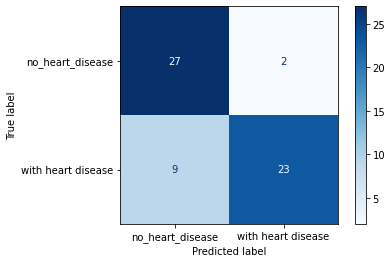

In [16]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['target'], 
                      display_labels=["no_heart_disease", "with heart disease"],
                      cmap='Blues')
plt.show()

#### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

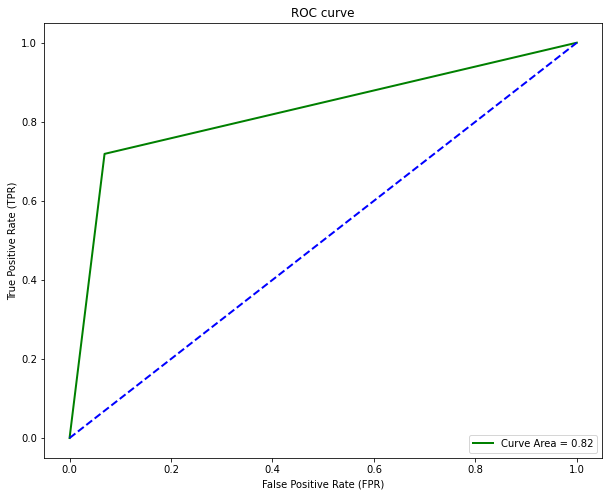

In [17]:
fpr, tpr, thr = roc_curve(y_test['target'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['target'], 
                             y_test['predicted_target']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.000000,0.00000
1,1.0,0.068966,0.71875
2,0.0,1.000000,1.00000


#### Classification report

In [19]:
class_report = classification_report(y_test['target'], 
                                     y_test['predicted_target'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



#### Tree diagram of the Decision Tree

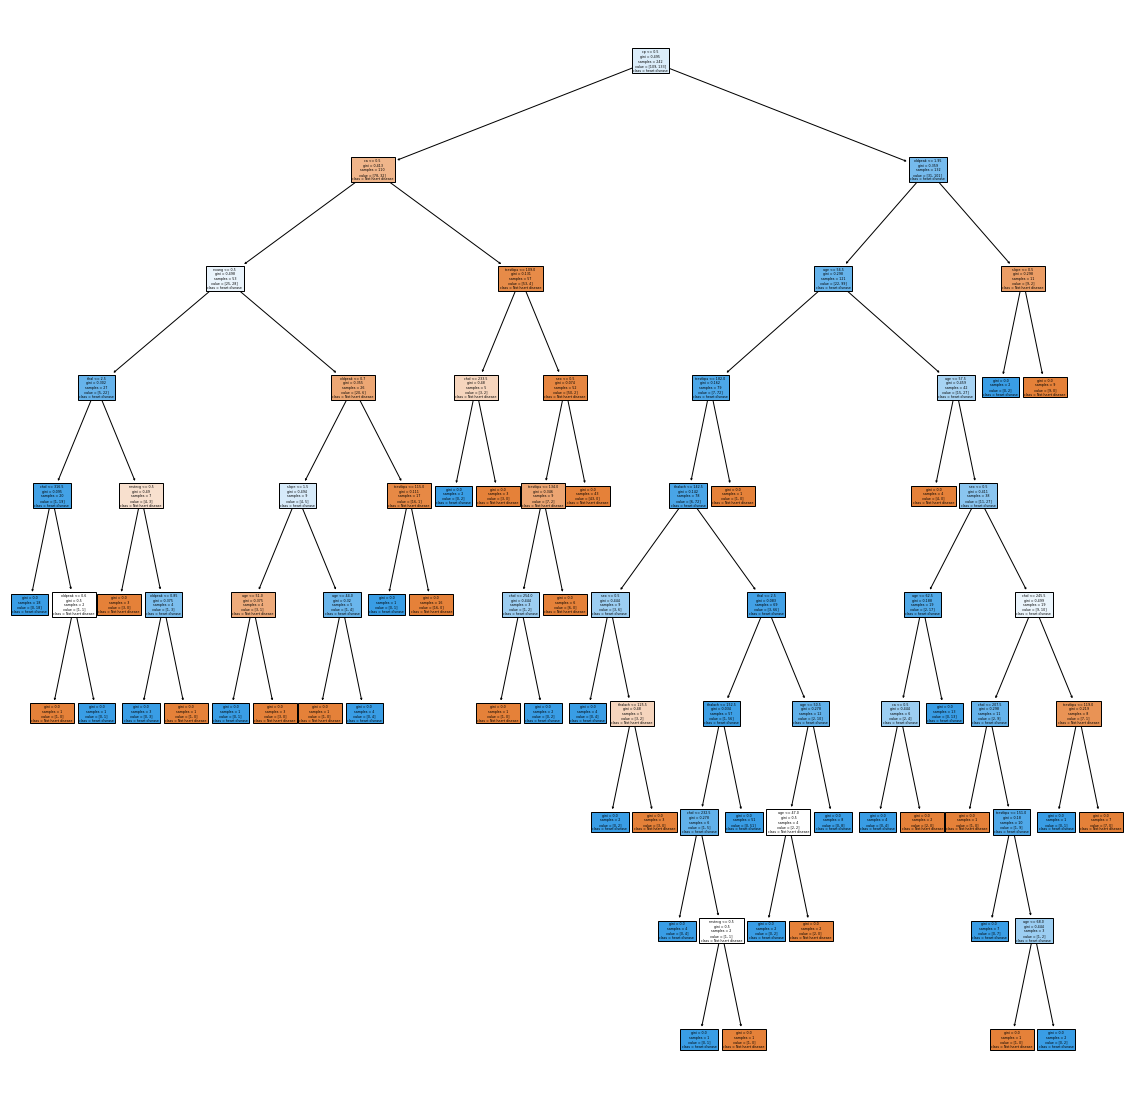

In [21]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()